# Hypothesis Testing

Hypothesis testing is a fundamental concept in statistics used to make decisions or inferences about a population parameter based on sample data. The process involves making assumptions about the population parameter (null hypothesis) and collecting evidence from the sample to evaluate whether those assumptions are reasonable.

#### Importing necessary libraries

In [1]:
import pandas as pd
from scipy.stats import t
from scipy.stats import ttest_ind
from scipy.stats import binom_test
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter
import numpy as np
import random

## Unfair Coin

In this part we are simulating an unfair coin that is biased toward landing on one face more
often than the other one (about 10% more probable). Thus the probability of tails is 0.45 and the probability of heads is 0.55 which is 10% more probable. We do the simulation for each sample size 1000 times and calculate the probability of getting a head for each sample size. We then plot the frequency percentage of getting a head based on the probability for each sample size.  
We set `alpha = 0.05` as the confidence level is 95% (alpha = 1 - 0.95 = 0.05).  
Calculation of p_value is done using `binom_test()` function from `scipy.stats` library. This function calculates the p_value for a binomial test based on the number of successes and the number of trials. We then compare the p_value with alpha to determine if the null hypothesis is rejected or not. As we know p-value is the level of marginal significance within a statistical hypothesis test, representing the probability of the occurrence of a given event.  
Here the null hypothesis is that the coin is fair and the alternative hypothesis is that the probability of getting a head is more so we have a one-tailed test. A one-tailed test will test either if the probability of getting a head is more than a tail or the coin is fair.  
In order to determine the critical z-value, we use `norm.ppf()` function from `scipy.stats` library. This function calculates the critical z-value for a given alpha. We calculate z-value using the formula: $z = \frac{p - p_0}{\sqrt{\frac{p_0(1-p_0)}{n}}}$ where $p$ is the probability of getting a head, $p_0$ is the probability of getting a head for a fair coin (null hypothesis) and $n$ is the sample size. We then compare the z-value with the critical z-value to determine if the null hypothesis is rejected or not. If the z-value is greater than the critical z-value, we reject the null hypothesis, thus the coin is unfair and the probability of getting a head is more.  
The z-value, also known as the z-score, represents the number of standard deviations a data point is from the mean of a distribution.

Sample Size: 30


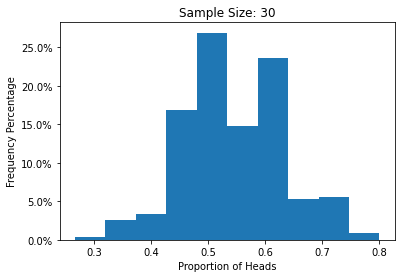

Confidence Interval (95%): [0.5172, 0.5798]
Mean p-value: 0.5548
67 out of 1000 times the null hypothesis was rejected using p_value.
P-Value: fail to reject the null hypothesis: The coin is fair.
The calculated z-score is 0.5313 while the critical z-value is 1.645.
Z-Score: fail to reject the null hypothesis: The coin is fair.

_______________________________________________________________________
Sample Size: 100


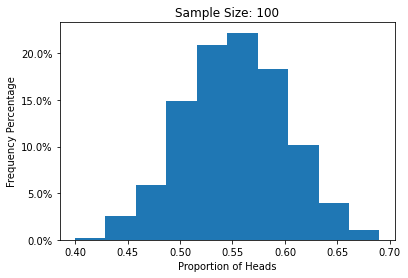

Confidence Interval (95%): [0.5428, 0.5622]
Mean p-value: 0.3972
151 out of 1000 times the null hypothesis was rejected using p_value.
P-Value: fail to reject the null hypothesis: The coin is fair.
The calculated z-score is 1.0506 while the critical z-value is 1.645.
Z-Score: fail to reject the null hypothesis: The coin is fair.

_______________________________________________________________________
Sample Size: 1000


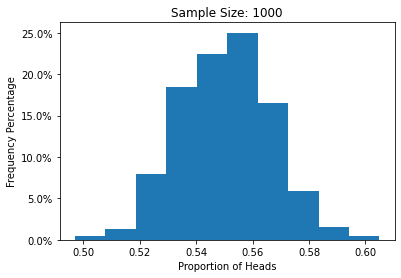

Confidence Interval (95%): [0.5494, 0.5514]
Mean p-value: 0.0246
882 out of 1000 times the null hypothesis was rejected using p_value.
P-Value: reject the null hypothesis: The coin is biased and the probability of getting Heads is more
The calculated z-score is 3.1866 while the critical z-value is 1.645.
Z-Score: reject the null hypothesis: The coin is biased and the probability of getting Heads is more


In [5]:
BIAS = 0.05
FLIPS_COUNT = 1000

def test_coin(sample_size, alpha=0.05):
    outcomes = ['heads', 'tails']
    p_expected = 0.5
    p_observed = []
    does_reject_null_hypothesis = []
    p_values = []
    
    for _ in range(FLIPS_COUNT):
        flips = random.choices(outcomes, weights=[0.5 + BIAS, 0.5 - BIAS], k=sample_size)
        heads_count = flips.count('heads')
        p_observed.append(heads_count / sample_size)
        p_value = binom_test(heads_count, sample_size, p_expected)
        p_values.append(p_value)
        if p_value < alpha:
            does_reject_null_hypothesis.append(True)
        else:
            does_reject_null_hypothesis.append(False)

    plt.hist(p_observed, weights=np.ones(len(p_observed)) / len(p_observed))
    plt.title(f"Sample Size: {sample_size}")
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
    plt.xlabel("Proportion of Heads")
    plt.ylabel("Frequency Percentage")
    plt.show()
    
    sample_mean = np.mean(p_observed)
    std_divide_by_rad_n = np.sqrt((p_expected * (1 - p_expected)) / sample_size)
    critical_z = round(norm.ppf(0.95, loc=0, scale=1), 3)
    z_score = (sample_mean - p_expected) / std_divide_by_rad_n
    
    mean_p = np.mean(p_observed)
    std_err = np.std(p_observed) / np.sqrt(sample_size)
    
    margin_of_error = 1.96 * std_err
    ci_lower = mean_p - margin_of_error
    ci_upper = mean_p + margin_of_error
    print(f"Confidence Interval (95%): [{ci_lower:.4f}, {ci_upper:.4f}]")

    p_value = np.mean(p_values)
    print(f"Mean p-value: {p_value:.4f}")
    print(f"{does_reject_null_hypothesis.count(True)} out of {FLIPS_COUNT} times the null hypothesis was rejected using p_value.")
    if (does_reject_null_hypothesis.count(True) >= FLIPS_COUNT/2):
        print("P-Value: reject the null hypothesis: The coin is biased and the probability of getting Heads is more")
    else:
        print("P-Value: fail to reject the null hypothesis: The coin is fair.")
        
    print(f"The calculated z-score is {z_score:.4f} while the critical z-value is {critical_z}.")
    if (z_score > critical_z):
        print("Z-Score: reject the null hypothesis: The coin is biased and the probability of getting Heads is more")
    else:
        print("Z-Score: fail to reject the null hypothesis: The coin is fair.")
    
    return z_score

print("Sample Size: 30")
z_score1 = test_coin(sample_size=30)
print("\n_______________________________________________________________________")
print("Sample Size: 100")
z_score2 = test_coin(sample_size=100)
print("\n_______________________________________________________________________")
print("Sample Size: 1000")
z_score3 = test_coin(sample_size=1000)


As we can see the p-value decreases as the sample size increases. This is because the probability of getting a head becomes more accurate as the sample size increases. So the p-value becomes smaller than alpha most of the time. This means that we can reject the null hypothesis that the coin is fair and accept the alternative hypothesis that the coin is unfair. Also the z-value increases as the sample size increases and we can get the same result as the p-value. This is because the concepts of p-value and z-value are related but represent different aspects of statistical analysis. The z-score directly tells you how many standard deviations your sample statistic is from the null hypothesis, while the p-value tells you the probability of observing such an extreme (or more extreme) value under the null hypothesis  
Also it is clear that the histogram of the frequency percentage of getting a head is normally distributed as the sample size increases and the mean of the distribution gets closer to 0.55 which is the probability of getting a head in our assumption.  

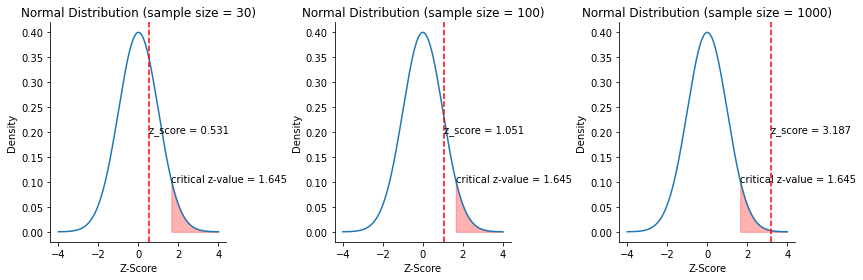

In [7]:
z_scores = [z_score1, z_score2, z_score3]
sample_sizes = [30, 100, 1000]

fig, axes = plt.subplots(1, 3, figsize=(12, 4))
x = np.linspace(-4, 4, 1000)
critical_z = round(norm.ppf(0.95, loc=0, scale=1), 3)

for i, z_score in enumerate(z_scores):
  y = norm.pdf(x)
  axes[i].plot(x, y)
  axes[i].fill_between(x, y, where=(x > critical_z), color='red', alpha=0.3)
  axes[i].axvline(x=z_score, color='red', linestyle='--', label='z-score')
  axes[i].text(critical_z, 0.1, f"critical z-value = {critical_z}", fontsize=10, ha='left')
  axes[i].annotate(f"z_score = {z_score:.3f}", xy=(z_score, 0.1), xytext=(z_score, 0.2))
  axes[i].set_xlabel('Z-Score')
  axes[i].set_ylabel('Density')
  axes[i].set_title(f'Normal Distribution (sample size = {sample_sizes[i]})')
  axes[i].spines['top'].set_visible(False)
  axes[i].spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

As we can see in the plots above, z-score increases with the increase of sample size and it surely gets greater than critical z-value which is 1.645 for alpha = 0.05 for sample size = 1000. This means that we can reject the null hypothesis and accept the alternative hypothesis that the probability of getting a head is more.

## T-Test

A t-test is a statistical hypothesis test used to determine if there is a significant difference between the means of two groups. It's commonly used when you have two groups of samples and you want to know if they have different average values or if one group tends to be higher or lower than the other.

#### Independent Samples t-test

This test is used to compare the means of two independent groups to determine if they are significantly different from each other. It assumes that the samples are drawn from normally distributed populations with unknown but equal variances.

### Job Placement

There is a common belief that working alongside studying has a negative impact on students' grades. We are given a job placement dataset that contains information about students studying in USA various universities alongside their job status. We want to perform a hypothesis test to test whether this belief is true or not. In this test, it is assumed that the variance is unknown but equal for both groups.

we derive the hypotheses to be tested from the question:

- #### $H_{0}$ (Null Hypothesis):
There is no difference in grades between students who work alongside studying and those who do not.

- #### $H_{a}$ (Alternative Hypothesis):
Working students have a significantly lower grades than non-working students.

First, we load the dataset and take a look at it:

In [2]:
students_df = pd.read_csv('job_placement.csv')

students_df

,id,name,gender,age,degree,stream,college_name,placement_status,salary,gpa,years_of_experience
0,1,John Doe,Male,25,Bachelor's,Computer Science,Harvard University,Placed,60000,3.7,2.0
1,2,Jane Smith,Female,24,Bachelor's,Electrical Engineering,Massachusetts Institute of Technology,Placed,65000,3.6,1.0
2,3,Michael Johnson,Male,26,Bachelor's,Mechanical Engineering,Stanford University,Placed,58000,3.8,3.0
3,4,Emily Davis,Female,23,Bachelor's,Information Technology,Yale University,Not Placed,0,3.5,2.0
4,5,David Brown,Male,24,Bachelor's,Computer Science,Princeton University,Placed,62000,3.9,2.0
...,...,...,...,...,...,...,...,...,...,...,...
695,696,Lucas Taylor,Male,23,Bachelor's,Computer Science,University of Washington,Placed,67000,3.8,3.0
696,697,Emma Martinez,Female,26,Bachelor's,Electronics and Communication,University of California--Berkeley,Placed,66000,3.9,3.0
697,698,Aiden Davis,Male,24,Bachelor's,Computer Science,University of Illinois--Urbana-Champaign,Placed,65000,3.8,3.0
698,699,Mia Wilson,Female,23,Bachelor's,Electrical Engineering,University of Colorado--Boulder,Placed,66000,3.7,2.0


For this problem, we only need the information in the `placement_status` and `GPA` columns. So, we will select these specific columns for our analysis.

In [3]:
students_df = students_df[['id', 'placement_status', 'gpa']]

students_df

,id,placement_status,gpa
0,1,Placed,3.7
1,2,Placed,3.6
2,3,Placed,3.8
3,4,Not Placed,3.5
4,5,Placed,3.9
...,...,...,...
695,696,Placed,3.8
696,697,Placed,3.9
697,698,Placed,3.8
698,699,Placed,3.7


Then we split students into two groups based on their job placement status:

In [4]:
placed_students_df = students_df[students_df['placement_status'] == 'Placed']
unplaced_students_df = students_df[students_df['placement_status'] == 'Not Placed']

The `describe()` method is applied to get a statistical summary of the data:

In [5]:
placed_students_df.describe()

,id,gpa
count,570.000000,570.000000
mean,351.757895,3.761404
std,201.313222,0.113352
min,1.000000,3.500000
25%,179.250000,3.700000
50%,352.000000,3.800000
75%,524.750000,3.900000
max,699.000000,3.900000


In [6]:
unplaced_students_df.describe()

,id,gpa
count,130.000000,130.000000
mean,344.984615,3.702308
std,206.831916,0.141676
min,4.000000,3.400000
25%,162.250000,3.600000
50%,344.000000,3.700000
75%,523.500000,3.900000
max,700.000000,3.900000


Here, we draw two box plots side by side, one for placed students with blue color elements and another for unplaced students with red color elements, making it easy to compare the distribution of GPAs between the two groups.

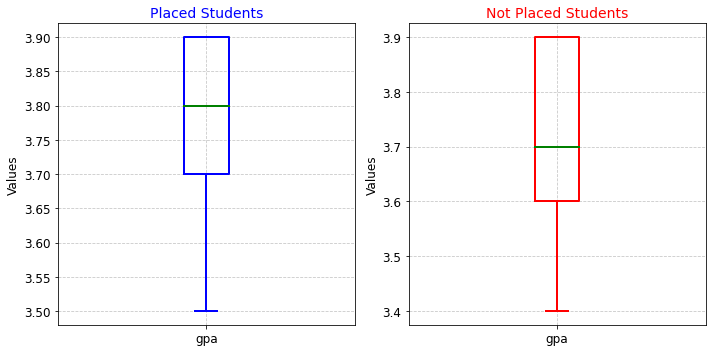

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

boxprops = dict(color="blue", linewidth=2)
whiskerprops = dict(color="blue", linewidth=2)
capprops = dict(color="blue", linewidth=2)
medianprops = dict(color="green", linewidth=2)
flierprops = dict(marker='o', markerfacecolor='blue', markersize=8, linestyle='none', alpha=0.5)

placed_students_df.boxplot(column='gpa', ax=axes[0], boxprops=boxprops, whiskerprops=whiskerprops, capprops=capprops, medianprops=medianprops, flierprops=flierprops)

boxprops = dict(color="red", linewidth=2)
whiskerprops = dict(color="red", linewidth=2)
capprops = dict(color="red", linewidth=2)
flierprops = dict(marker='o', markerfacecolor='red', markersize=8, linestyle='none', alpha=0.5)

unplaced_students_df.boxplot(column='gpa', ax=axes[1], boxprops=boxprops, whiskerprops=whiskerprops, capprops=capprops, medianprops=medianprops, flierprops=flierprops)

axes[0].set_title('Placed Students', fontsize=14, color='blue')
axes[1].set_title('Not Placed Students', fontsize=14, color='red')

axes[0].set_ylabel('Values', fontsize=12)
axes[1].set_ylabel('Values', fontsize=12)

for ax in axes:
    ax.tick_params(axis='both', labelsize=12)

for ax in axes:
    ax.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

#### t-statistic and degrees of freedom

Now we want to calculate the `t-statistic` and `degrees of freedom` for these two groups.

- `degrees of freedom`

Degrees of freedom, often denoted as `df`, refer to the number of independent values or quantities that can be assigned to a statistical distribution. In the context of statistical tests, degrees of freedom are the number of independent pieces of information used to calculate a statistic, typically calculated as the sample size minus the number of parameters estimated.

- `t-statistic`

The t-statistic is a value used in hypothesis testing, specifically in a t-test, to determine whether to support or reject the null hypothesis. It's calculated as the ratio of the departure of the estimated value of a parameter from its hypothesized value to its standard error. The t-statistic is particularly useful when the sample size is small or the population standard deviation is unknown.

#### degrees of freedom

Here, we calculate the degrees of freedom for a statistical test, where `n1` and `n2` represent the counts of placed and unplaced students, respectively. The degrees of freedom are determined by adding `n1` and `n2` and subtracting 2. Here is the formula:

$$df = n_{1} + n_{2} - 2$$

where

$$n_1 = sample\; size\; of\; first\; sample$$
$$n_2 = sample\; size\; of\; second\; sample$$

In [8]:
placed_student_count = len(placed_students_df)
unplaced_student_count = len(unplaced_students_df)

n1 = placed_student_count
n2 = unplaced_student_count

degrees_of_freedom = n1 + n2 - 2

print('n1 = ', placed_student_count)
print('n2 = ', unplaced_student_count)
print('Degrees of Freedom = ', degrees_of_freedom)

n1 =  570
n2 =  130
Degrees of Freedom =  698


#### t-statistic

Now, we calculate the t-statistic using this formula:

$$ t = \frac{\bar{x}_1 - \bar{x}_2}{s_{p} \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}} $$

with

$$ s_p = \sqrt{\frac{(n_1 - 1)s_1^{2} + (n_2 - 1)s_2^{2}}{n_{1} + n_{2} - 2}} $$

where

$$\bar{x}_1 = mean\; of\; first\; sample$$
$$\bar{x}_2 = mean\; of\; second\; sample$$

$$n_1 = sample\; size\; of\; first\; sample$$
$$n_2 = sample\; size\; of\; second\; sample$$

$$s_1 = standard\; deviation\; of\; first\; sample$$
$$s_2 = standard\; deviation\; of\; first\; sample$$

$$s_p = pooled\; standard\; deviation$$

We start by calculating the mean of two groups' samples:

##### mean

We defined a function `calculate_mean()` to find the average GPA from the dataset, ensuring division by zero is handled. Variables `x1` and `x2` store the mean GPAs for placed (working) and unplaced (non-working) students, respectively.

In [9]:
def calculate_mean(data):
    total = 0
    count = len(data)
    for value in data:
        total += value
    return (total / count) if count != 0 else 0

x1 = calculate_mean(placed_students_df['gpa'])
x2 = calculate_mean(unplaced_students_df['gpa'])

print("Mean gpa for working students = ", x1)
print("Mean gpa for non-working students = ", x2)

Mean gpa for working students =  3.761403508771934
Mean gpa for non-working students =  3.7023076923076896


##### standard deviation

Here, we defined a function `calculate_std_dev()` to compute the standard deviation of GPA values for two groups of students. It first calculates the mean, then the variance, and finally the standard deviation. `s1` is the standard deviation of GPAs for placed (working) students, and `s2` is for unplaced (non-working) students, both of which are printed out.

In [10]:
def calculate_std_dev(data):
    mean = calculate_mean(data)
    variance = 0
    count = len(data)
    for value in data:
        variance += (value - mean) ** 2
    variance = (variance / count) if count != 0 else 0
    std_dev = variance ** 0.5
    return std_dev

s1 = calculate_std_dev(placed_students_df['gpa'])
s2 = calculate_std_dev(unplaced_students_df['gpa'])

print("std of gpa for working students = ", s1)
print("std of gpa for non-working students = ", s2)

std of gpa for working students =  0.11325237453831037
std of gpa for non-working students =  0.14113026422171096


##### pooled standard deviation $(s_p)$

This code calculates the pooled standard deviation $s_p$, which is an estimate of the common standard deviation for two groups, assuming they have the same variance. It's computed by taking a weighted average of the variances of the two groups, with `n1` and `n2` being the sample sizes and `s1` and `s2` being the standard deviations of the respective groups. The result, `sp`, represents the pooled (estimated) standard deviation, which is then printed.

In [11]:
numerator = (n1 - 1)*(s1 ** 2) + (n2 - 1)*(s2 ** 2)
denominator = n1 + n2 - 2

sp = (numerator / denominator) ** 0.5

print("Pooled (Estimated) standard deviation = ", sp)

Pooled (Estimated) standard deviation =  0.11889800252726976


##### t-value $(t)$

Now it's time to calculate t-value (t-statistic):

In [12]:
numerator = x1 - x2
denominator = sp * (((1/n1) + (1/n2)) ** 0.5)

t_value = numerator / denominator

print("t-value = ", t_value)

t-value =  5.113782617673655


##### p-value $(p)$

We determine the `p-value` for the calculated `t-statistic` and `degrees of freedom` with the help of t-distribution. We used the `SciPy` library for this purpose by importing `t-distribution` from `scipy.stats`:

`from scipy.stats import t`

The p-value is calculated using the cumulative distribution function (CDF) of the t-distribution, `t.cdf()`, which gives the probability that a random variable drawn from the t-distribution will be less than or equal to the absolute t-value.

In [13]:
print('df = ', degrees_of_freedom)
print("t-value = ", t_value)

p_value = 1 - t.cdf(abs(t_value), df=degrees_of_freedom)

print("p-value = ", p_value)

df =  698
t-value =  5.113782617673655
p-value =  2.0417383961301994e-07


##### Decision Making

Finally, we will report the result of the test and make our decision.

- If the `p-value` is less than `alpha` (significance level) and the `t-value` is positive, it suggests that we have enough evidence saying that working students have a significantly lower GPA than non-working students, leading to the rejection of the null hypothesis.



- If the conditions are not met, the null hypothesis is not rejected, indicating insufficient evidence to conclude a significant difference in GPA based on working status.

In [14]:
# significance level
alpha = 0.05

if p_value < alpha and t_value > 0:
    print("Reject the null hypothesis.\nWorking students have a significantly lower GPA than non-working students.")
else:
    print("Fail to reject the null hypothesis.\nThere is insufficient evidence to conclude that working students have a lower GPA than non-working students.")

Reject the null hypothesis.
Working students have a significantly lower GPA than non-working students.


It can be seen that the null hypothesis is rejected.

So, we can say that with $95\%$ level of confidence, we cannot accept the null hypothesis.

### Hypothesis Test using SciPy Library

In this part, we performs a one-tailed independent samples t-test using the SciPy library to determine if there is a statistically significant difference in the GPAs of placed (working) and unplaced (non-working) students.

- `ttest_ind()` is a function from the SciPy library that calculates the `t-statistic` and `p-value` for the hypothesis test of whether two independent samples have identical average (expected) values.


- By setting `equal_var=True` we assume that the two groups have the same variance.


- The p-value is halved `(p_value/2)` because it's a one-tailed test; we're only interested in whether one mean is greater than the other, not just any difference.


- The significance level `alpha` is set at `0.05`, meaning there's a `5%` risk of concluding that a difference exists when there is no actual difference.

Now, let's perform the test:

In [15]:
t_value, p_value = ttest_ind(placed_students_df['gpa'], unplaced_students_df['gpa'], equal_var=True)
p_value = p_value/2

print('df = ', degrees_of_freedom)
print("t_value = ", t_value)
print("p-value = ", p_value)

df =  698
t_value =  5.105318956468754
p-value =  2.1318222470483946e-07


The values obtained for `p-value` and `t-value` are very accurately equal to the values that we had calculated ourselves using the formulas.

In [16]:
# significance level
alpha = 0.05

if p_value < alpha and t_value > 0:
    print("Reject the null hypothesis.\nWorking students have a significantly lower GPA than non-working students.")
else:
    print("Fail to reject the null hypothesis.\nThere is insufficient evidence to conclude that working students have a lower GPA than non-working students.")

Reject the null hypothesis.
Working students have a significantly lower GPA than non-working students.


Again, it can be seen that the null hypothesis is rejected.

So, we can say that with $95\%$ level of confidence, we cannot accept the null hypothesis.

This is exactly the same result we obtained from the test we performed by calculating the `t-statistic` and `p-value` using their formulas.

## Questions

#### Q3: How does increasing the sample size affect your coin test? 

As we can see, by increasing the sample size, the confidence interval becomes narrower and narrower. Also the p-value becomes smaller and smaller. This is because the sample mean is getting closer and closer to the true mean. In addition, as we expected the z-score becomes larger so we can reject the null hypothesis as the sample size increases.  
With larger sample sizes, estimates of population parameters (such as means or proportions) become more precise. As a result, observed differences between the sample and the null hypothesis become more apparent, leading to smaller p-values. With running the code multiple times, we can see that with sample size = 30 and 100, we fail to reject the null hypothesis most of the times but with sample size = 1000, the null hypothesis is rejected. With sample size = 30, the calculated z-value is less than the critical z-value and with sample size = 100 the calculated z-value gets closer to the critical z-value and with sample size = 1000, the calculated z-value gets greater than the critical z-value.

#### Q4: What are t-statistic, degrees of freedom, and t-distribution in t-test? How can they help us to compare two data sets?

### **t-distribution**

The t-distribution is a probability distribution that is symmetric and bell-shaped, similar to the normal distribution, but with heavier tails. It is used in hypothesis testing when the sample size is small and/or when the population standard deviation is unknown.

The shape of the t-distribution depends on the degrees of freedom. As the degrees of freedom increase, the t-distribution approaches the shape of the standard normal distribution (the z-distribution).

By comparing the calculated t-statistic to critical values from the t-distribution, you can determine whether the observed difference between the sample means is statistically significant.


### **degrees of freedom**

Degrees of freedom (df) represent the number of independent pieces of information available to estimate a parameter. In the context of a t-test, the degrees of freedom are used to determine the shape of the t-distribution and are calculated as $df = n_1 + n_2 - 2$, where $n_1$ and $n_2$ are the sample sizes of the two groups.

The degrees of freedom affect the spread and shape of the t-distribution, which in turn influences the critical values used for hypothesis testing.


### **t-statistic**

The t-statistic measures the difference between the means of two groups relative to the variation within the groups. It quantifies how much the sample means differ and provides a standardized measure of the difference.

Mathematically, the t-statistic is calculated as the difference between the sample means divided by the standard error of the difference. It is given by:

$$ t = \frac{\bar{x}_1 - \bar{x}_2}{s_{p} \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}} $$
     
     Where:
     
$\bar{x}_1$ and $\bar{x}_2$ are the sample means of the two groups.

$s_{p}$ is the pooled standard deviation, which combines the standard deviations of the two groups.

$n_1$ and $n_2$ are the sample sizes of the two groups.





In summary, the `t-statistic` measures the difference between sample means, the `degrees of freedom` determine the shape of the t-distribution, and the `t-distribution` provides critical values for hypothesis testing. Together, these components help us assess whether the difference between two data sets is statistically significant in a t-test.

#### Q5: What are the preliminary conditions for using t-test on our data?

To calculate an independent t-test we need one independent variable (placement_status) that has two characteristics or groups (Placed and Not Placed) and one metric dependent variable (gpa). These two groups should be compared in the analysis.

The assumptions are the following:

**1. There are two dependent groups or samples.**

As the name of independent samples t-test suggests, the samples must be independent. This means that a value in one sample must not influence a value in the other sample.

**2. The variables are interval scaled.**

For the t-test for independent samples, the mean value of the sample must be calculated, this is only meaningful if the variable is metric scaled.

**3. The variables are normally distributed.**

The t-test for independent samples gives the most accurate results when the data from each group are normally distributed. However, there are exceptions in special cases.

**4. The variance within the groups should be similar.**

Since the variance is needed to calculate the t value, the variance within each group should be similar. In this task, it is assumed that both groups have equal variance.

#### Q6: Read about some other types of tests that are used in scientific research. Write a line about each of them.


1. **ANOVA (Analysis of Variance)**:
ANOVA is used `to compare means across multiple groups simultaneously`, rather than just two groups as in a t-test. It assesses whether there are statistically significant differences between the means of three or more independent groups. It can also help identify which group means differ from each other.


2. **Chi-squared Test**: The chi-squared test is used `to assess the association between categorical variables`. It evaluates whether there is a significant difference between the observed frequencies and the expected frequencies in one or more categories. It's often used in contingency tables to test for independence or to compare observed and expected proportions.


3. **Regression Analysis**: Regression analysis is used `to examine the relationship between one or more independent variables (predictors) and a dependent variable`. It estimates the strength and direction of the relationship and can be used for prediction, explanation, and hypothesis testing. Common types include linear regression, logistic regression, and multiple regression.


4. **Correlation Analysis**: Correlation analysis `measures the strength and direction of the relationship between two continuous variables`. It assesses how closely the variables are related to each other. Common correlation coefficients include Pearson correlation coefficient (for linear relationships), Spearman rank correlation coefficient (for monotonic relationships), and Kendall's tau (for ordinal data).


5. **Non-parametric Tests**: Non-parametric tests are `used when data do not meet the assumptions of parametric tests (e.g., normal distribution, homogeneity of variances)`. These tests do not require specific assumptions about the distribution of the data. Examples include the Mann-Whitney U test (non-parametric equivalent of the independent samples t-test), Wilcoxon signed-rank test (non-parametric equivalent of the paired samples t-test), and Kruskal-Wallis test (non-parametric equivalent of ANOVA).


6. **Survival Analysis**: Survival analysis is `used to analyze time-to-event data, such as time until death, failure, or occurrence of an event`. It models the time-to-event outcome and examines the effects of predictor variables on survival probabilities over time. Common methods include Kaplan-Meier estimator and Cox proportional hazards model.


These are just a few examples of the many statistical tests available for analyzing different types of data and addressing various research questions in scientific research. Each test has its own assumptions, applications, and interpretations, and choosing the appropriate test depends on the specific characteristics of the data and the research objectives.